### evaluate

In [ ]:
from stable_baselines3 import PPO
from geneEnv import geneEnv
from ratioEnv import ratioEnv
from pig import pig


modelName = "MediFlower2-2"
model = PPO.load("result\\"+modelName+"\\trained_model.zip")

with open("result\\"+modelName+"\\pigInfo.txt", "r") as f:
    code = f.read()
# 읽어온 코드 실행
exec(code)
print("Evaluating")
#env = model.get_env()
env = ratioEnv(1,32,3)
env.reset()
#model.set_env(env)


#check_env(env)

test = []
for tt in range(5):
    obs, _ = env.reset()
    done = False

    reward_list = []
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _, info = env.step(action)
        reward_list.append(reward)
        # print(reward)
        # print(obs)

    print(sum(reward_list)/len(reward_list))
    test.append(sum(reward_list)/len(reward_list))
    #print("Result : ",end=' ')
    
#print(sum(test)/len(test))

Gene Environment setting success
Evaluating
-2453.4830729166665
-2325.8463541666665
-2473.502604166667
-2455.4361979166665
-2475.944010416667


In [1]:
from stable_baselines3 import PPO
from geneEnv import geneEnv
from pig import pig


modelName = "TwoDiseInverse"
model = PPO.load("result\\"+modelName+"\\trained_model.zip")

with open("result\\"+modelName+"\\pigInfo.txt", "r") as f:
    code = f.read()
# 읽어온 코드 실행
exec(code)
print("Evaluating")
#env = model.get_env()
env = geneEnv(2,32,80)
#model.set_env(env)


#check_env(env)

test = []
for tt in range(5):
    obs, _ = env.reset()

    reward_list = []
    for i in range(1000):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _, info = env.step(action)
        reward_list.append(reward)
        #print(obs)

    print(sum(reward_list)/len(reward_list))
    test.append(sum(reward_list)/len(reward_list))
    
print(sum(test)/len(test))

Gene Environment setting success
Evaluating
32.0
32.0
64.0
63.979
63.971
51.19


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(reward_list,'r')
plt.grid(True)
plt.show()

In [7]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/MediFlower2/'

f1 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
next(f)
next(f)
next(f)

rewards_dise = []
for row in f:
    rewards_dise.append(float(row[0]))
    
edited_rewards_dise = []
for i in range(0,len(rewards_dise)-10000,10000):
    edited_rewards_dise.append(sum(rewards_dise[i:i+10000])/10000)





In [5]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/MultiAlle/'

f1 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
next(f)
next(f)
next(f)

rewards_inv = []
for row in f:
    rewards_inv.append(float(row[0]))
    
edited_rewards_inv = []
for i in range(0,len(rewards_inv)-1000,1000):
    edited_rewards_inv.append(sum(rewards_inv[i:i+1000])/1000)



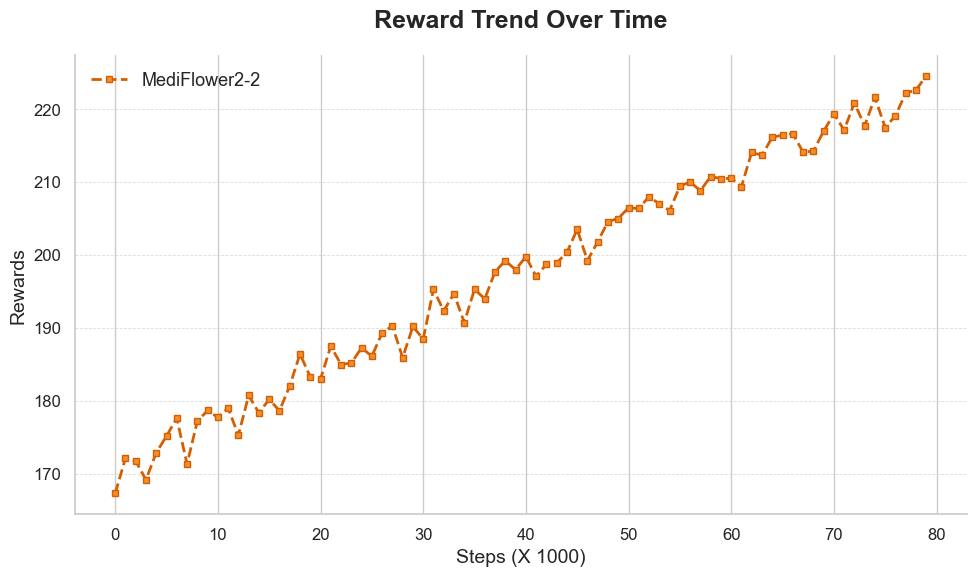

In [6]:
# Seaborn 스타일 설정 (모던하고 깔끔한 스타일로 설정)
sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})

# 플롯 크기 설정
plt.figure(figsize=(10, 6))

# 곡선 플롯
plt.plot(edited_rewards_inv, color="#D55E00", label='MediFlower2-2', linestyle='--', marker='s', markersize=4, markerfacecolor="#F28E2B")
#plt.plot(edited_rewards_inv, color="#4C72B0", label='Inverse Rewards', linestyle='-', marker='o', markersize=4, markerfacecolor="#55A868")

# 그래프 제목과 축 레이블 (모던한 서체와 적절한 폰트 크기 설정)
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Steps (X 1000)', fontsize=14)
plt.ylabel('Rewards', fontsize=14)

# 눈금 표시 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그리드 설정 (세로선만 표시, 과하지 않게)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)

# 레전드 추가
plt.legend(loc='best', frameon=False, fontsize=13)

# 스타일에 모던한 감각을 더하는 '축 오른쪽과 위쪽 제거' (논문용 그래프에서 자주 사용되는 간결한 스타일)
sns.despine()

# 그래프 저장 (고해상도, 논문용으로 적합)
plt.tight_layout()
#plt.savefig('rewards_graph.png', dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()

In [14]:
diseStart = sum(edited_rewards_dise[:10])/len(edited_rewards_dise[:10])
diseEnd = sum(edited_rewards_dise[-10:])/len(edited_rewards_dise[-10:])
invStart = sum(edited_rewards_inv[:10])/len(edited_rewards_inv[:10])
invEnd = sum(edited_rewards_inv[-10:])/len(edited_rewards_inv[-10:])

print(f"dise start : {diseStart:.3f}")
print(f"dise end : {diseEnd:.3f}")
print(f"inv start : {invStart:.3f}")
print(f"inv end : {invEnd:.3f}")


dise start : 47.751
dise end : 54.621
inv start : 16.236
inv end : 47.794
